In [1]:
import librosa
import numpy as np
from keras import models
import os
from sklearn.metrics import confusion_matrix
import soundfile as sf
import IPython.display
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

1. resampling -> 16000
2. split 2 secs
3. predict

In [2]:
def load(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)
    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [3]:
def load2(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)
    y, sr = librosa.load(wav, sr=file_sr)
    
    resample = librosa.resample(y, sr, 16000)
    
    return resample

In [15]:
y, sr = load2('record2.wav')
len(y)

573782

In [16]:
import IPython.display
IPython.display.Audio(data=y, rate=16000)

In [7]:
def padding(a, i) :
    if (a.shape[1] >= i) :
        return a[:, 0:i]
    else :
        difference = i-a.shape[1]
        zeros = np.random.randint(difference+1)
        
        #print(zeros, difference-zeros)
        
        first = np.zeros((a.shape[0], zeros))
        second = np.zeros((a.shape[0], difference - zeros))
        
        new = np.hstack((first, a))
        new = np.hstack((new, second))
        
        return new

In [3]:
model = models.load_model('model_final/dataset_ver30_biglr/train_X_ex_best.h5')

In [13]:
y, sr = load('test_full.wav')
resample = librosa.resample(y, sr, 16000)
sf.write('test_full_16000.wav', resample, 16000, subtype='PCM_16')

44100


In [14]:
y, sr = load('test_full2_16000.wav')
sr

16000


16000

In [8]:
model = models.load_model('C:/Users/JLK/speech/src/test/model/test_model_2.h5')

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]


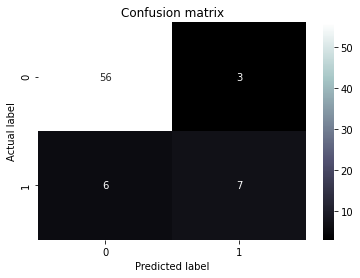

acc:  0.875
precision:  0.7
recall:  0.5384615384615384


In [9]:
directory = 'test_full/'
file_list = os.listdir(directory)

predict = []

for file in file_list:
    y, sr = load(directory + file)
    resample = librosa.resample(y, sr, 16000)

    test = []
    sound = []

    for i in range (int(len(resample)/16000)-1):
        p = i * 16000
        q = p + 32000
        split = resample[p:q]
    
#         max_mine = np.max(split)
#         ratio = 0.46202388 / max_mine
    
#         split = split * ratio
    
        sound.append(split)
        mfcc = librosa.feature.mfcc(split, sr=16000)
        #padded_mfcc = padding(mfcc, 63)
        test.append(mfcc)
    test = np.array(test)
    test_X = np.expand_dims(test, -1)

    Y_pred = model.predict(test_X)
    #print(Y_pred)
#     y_pred = np.argmax(Y_pred >= 0.9,axis=1)
    y_pred = np.argmax(Y_pred,axis=1)
    for i in range(len(y_pred)):
        predict.append(y_pred[i])
        
print('[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]')    
print(predict)
print(answer)

tn, fp, fn, tp = confusion_matrix(answer, predict).ravel()
matrix = confusion_matrix(answer, predict)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print('acc: ', (tn+tp)/(tn+fp+fn+tp))
print('precision: ', tp / (tp+fp))
print('recall: ', tp / (tp+fn))       

In [150]:
len(predict)

72

In [3]:
model = models.load_model('model_final/dataset_mix_biglr/train_X_ex_best.h5')

In [15]:
model = models.load_model('model_final/dataset_ver11_biglr/train_X_ex_best.h5')

In [8]:
y, sr = load('test_full3.wav')
resample = librosa.resample(y, sr, 16000)

test = []
sound = []

for i in range (int(len(resample)/16000)-1):
    p = i * 16000
    q = p + 32000
    split = resample[p:q]
    
    max_mine = np.max(split)
    ratio = 0.46202388 / max_mine
    
    split = split * ratio
    
    sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
#     padded_mfcc = padding(mfcc, 63)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
y_pred = np.argmax(Y_pred,axis=1)
print('[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]')    
print(y_pred)
#print('[0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0]')

# tn, fp, fn, tp = confusion_matrix(dh_answer, y_pred).ravel()
# matrix = confusion_matrix(dh_answer, y_pred)
# sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.show()

# print('acc: ', (tn+tp)/(tn+fp+fn+tp))
# print('precision: ', tp / (tp+fp))
# print('recall: ', tp / (tp+fn))   

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
[0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0]


NameError: name 'dh_answer' is not defined

In [517]:

IPython.display.Audio(data=sound[0], rate=16000)

In [518]:
IPython.display.Audio(data=sound[1], rate=16000)

In [519]:
IPython.display.Audio(data=sound[2], rate=16000)

In [520]:
IPython.display.Audio(data=sound[3], rate=16000)

In [521]:
IPython.display.Audio(data=sound[4], rate=16000)

In [552]:
IPython.display.Audio(data=sound[5], rate=16000)

In [523]:
IPython.display.Audio(data=sound[6], rate=16000)

In [524]:
IPython.display.Audio(data=sound[7], rate=16000)

In [525]:
IPython.display.Audio(data=sound[8], rate=16000)

In [377]:
IPython.display.Audio(data=sound[9], rate=16000)

IndexError: list index out of range

In [247]:
IPython.display.Audio(data=sound[10], rate=16000)

In [248]:
IPython.display.Audio(data=sound[11], rate=16000)

In [249]:
IPython.display.Audio(data=sound[12], rate=16000)

In [250]:
IPython.display.Audio(data=sound[13], rate=16000)

In [251]:
IPython.display.Audio(data=sound[14], rate=16000)

In [252]:
IPython.display.Audio(data=sound[15], rate=16000)

In [253]:
IPython.display.Audio(data=sound[16], rate=16000)

In [254]:
IPython.display.Audio(data=sound[17], rate=16000)

In [255]:
IPython.display.Audio(data=sound[18], rate=16000)

In [256]:
IPython.display.Audio(data=sound[19], rate=16000)

IndexError: list index out of range

In [130]:
IPython.display.Audio(data=sound[20], rate=16000)

In [131]:
IPython.display.Audio(data=sound[21], rate=16000)

In [109]:
IPython.display.Audio(data=sound[22], rate=16000)

In [135]:
IPython.display.Audio(data=sound[23], rate=16000)

In [136]:
IPython.display.Audio(data=sound[24], rate=16000)

In [112]:
IPython.display.Audio(data=sound[25], rate=16000)

In [113]:
IPython.display.Audio(data=sound[26], rate=16000)

In [114]:
IPython.display.Audio(data=sound[27], rate=16000)

In [137]:
IPython.display.Audio(data=sound[28], rate=16000)

In [138]:
IPython.display.Audio(data=sound[29], rate=16000)

In [139]:
IPython.display.Audio(data=sound[30], rate=16000)

In [140]:
IPython.display.Audio(data=sound[31], rate=16000)

In [141]:
IPython.display.Audio(data=sound[32], rate=16000)

In [134]:
IPython.display.Audio(data=sound[33], rate=16000)

In [121]:
import soundfile as sf

In [389]:
import soundfile as sf
y, sr = load('test_full2.wav')
p = 165
q = 175
sf.write('test_full2/test_full2_13.wav', y[p*sr:q*sr], sr, subtype='PCM_16')

In [ ]:
x=sound[4]
sound[4]=x

In [228]:
sound[5][:13000] = 0

In [507]:
sf.write('full_3_sound[5].wav', sound[5], 16000, subtype='PCM_16')

In [782]:
new = []

In [787]:
y, sr = load('sound[7]_split.wav')
for i in range(len(y)):
    new[i + 16000] = y[i]
    if(i == 15999):
        break

In [783]:
for i in range(32000):
    new.append(0)

In [788]:
sf.write('sound[7]_split2.wav', new, 16000, subtype='PCM_16')

In [3]:
answer = [0,
0,
0,
0,
0,
1,
0,
0,
0,
0,
0,
0,
0,
1,
1,
0,
0,
0,
0,
0,
0,
0,
1,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
0,
0,
0,
0,
0,
0,
1,
1,
0,
0,
0,
0,
0,
1,
1,
0,
0,
0,
0,
0,
0,
0,
0,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
0]

In [9]:
dj_answer = [0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0]

In [245]:
y, sr = load('sound[6]_full.wav')
sr

16000

In [259]:
dh_answer = [1,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0]

In [424]:
three_answer = []
for i in range(99):
    three_answer.append(0)

In [6]:
three_answer = [0,0,0,0,0,0,1,1,0,
               0,1,1,0,0,0,1,1,0,
               0,1,1,0,0,0,1,1,0,
               0,1,1,0,0,0,0,1,1,
               0,0,0,0,1,1,0,0,0,
               0,0,0,0,0,1,1,0,0,
               0,0,1,0,0,0,0,0,0,
               0,0,0,1,1,0,0,0,0,
               0,0,0,0,1,1,1,1,0,
               0,1,1,1,0,0,0,0,0,
               0,0,0,0,0,1,0,1,1]

In [444]:
len(predict)

99

In [53]:
y = load2('test_full/test_full_5.wav')

In [54]:
sf.write('test2.wav', y[2*16000:8*16000], 16000, subtype='PCM_16')

In [25]:
y, sr = load('test_full/test_full_3.wav')
resample = librosa.resample(y, sr, 16000)

test = []
sound = []

for i in range (int(len(resample)/1600)-19):
    p = i * 1600
    q = p + 32000
    split = resample[p:q]
#     max_mine = np.max(split)
#     ratio = 0.46202388 / max_mine
    
#     sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
#     padded_mfcc = padding(mfcc, 63)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
y_pred = np.argmax(Y_pred,axis=1)
print('[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]')    
print(y_pred)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


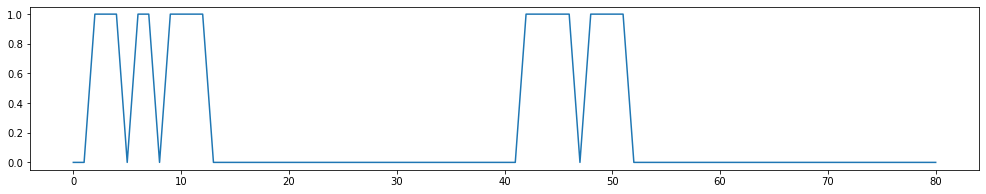

In [26]:
plt.figure(figsize=(17, 3))
plt.plot(y_pred)

In [241]:
y, sr = load('test_full/test_full_1.wav')
resample = librosa.resample(y, sr, 16000)

test = []
sound = []

for i in range (int(len(resample)/3200)-9):
    p = i * 3200
    q = p + 32000
    split = resample[p:q]
    max_mine = np.max(split)
    ratio = 0.46202388 / max_mine
    
    sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
#     padded_mfcc = padding(mfcc, 63)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
y_pred = np.argmax(Y_pred,axis=1)
print('[0 1 2 3 4 5 6 7 8 9 1 1 2 3 4 5 6 7 8 9 2 1 2 3 4 5 6 7 8 9 3 1 2 3 4 5 6 7 8 9]')    
print(y_pred)

[0 1 2 3 4 5 6 7 8 9 1 1 2 3 4 5 6 7 8 9 2 1 2 3 4 5 6 7 8 9 3 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0]


In [19]:
y, sr = load('test_full/test_full_1.wav')
resample = librosa.resample(y, sr, 16000)

test = []
sound = []

for i in range (int(len(resample)/16000)-1):
    p = i * 16000
    q = p + 32000
    split = resample[p:q]
    
#     max_mine = np.max(split)
#     ratio = 0.46202388 / max_mine
    
#     split = split * ratio
    
    sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
#     padded_mfcc = padding(mfcc, 63)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
y_pred = np.argmax(Y_pred,axis=1)
print('[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]')    
print(y_pred)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0]


In [208]:
IPython.display.Audio(data=sound[39], rate=16000)

In [115]:
IPython.display.Audio(data=sound[1], rate=16000)

In [116]:
IPython.display.Audio(data=sound[4], rate=16000)

In [117]:
IPython.display.Audio(data=sound[5], rate=16000)

In [91]:
IPython.display.Audio(data=sound[19], rate=16000)

In [92]:
IPython.display.Audio(data=sound[20], rate=16000)

In [93]:
IPython.display.Audio(data=sound[36], rate=16000)

In [80]:
y, sr = load('test_full3.wav')
resample = librosa.resample(y, sr, 16000)

In [81]:
test = []
sound = []

for i in range (int(len(resample)/1600)-19):
    p = i * 1600
    q = p + 32000
    split = resample[p:q]
#     max_mine = np.max(split)
#     ratio = 0.46202388 / max_mine
    
#     split = split * ratio
    
    sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
#     padded_mfcc = padding(mfcc, 63)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
# y_pred = np.argmax(Y_pred,axis=1)
y_pred = np.argmax(Y_pred,axis=1)

fire_count = 0
non_count = 0
fire_predict = []
imsi_predict = []
for i in range(len(y_pred)):
    
    if(y_pred[i] == 0):
        non_count = non_count + 1
        
        if(non_count >= 3):
            fire_count = 0
        
    else :
        fire_count = fire_count + 1
        non_count = 0
        if(fire_count >= 5):
            imsi_predict.append(i)

n = 0
for i in range(len(imsi_predict)):
    if(imsi_predict[i] > n):
        print(imsi_predict[i])
        n = imsi_predict[i] + 20
                
            
imsi_predict            
#     print(i, non_count, fire_count)

4
35
56
89
125
154


[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 154,
 156,
 157,
 158,
 159,
 160,
 161]

In [84]:
IPython.display.Audio(data=sound[35], rate=16000)

In [34]:
fire_count = 0
non_count = 0
fire_predict = []
imsi_predict = [0]
for i in range(len(y_pred)):
    
    if(y_pred[i] == 0):
        non_count = non_count + 1
        
        if(non_count >= 3):
            fire_count = 0
        
    else :
        fire_count = fire_count + 1
        non_count = 0
        if(fire_count >= 8):
            imsi_predict.append(i)
            if(imsi_predict[-2] is not i-1):
                print(i)
                fire_predict.append(i)
    
    print(i, non_count, fire_count)

0 1 0
1 0 1
2 0 2
3 0 3
4 1 3
5 0 4
6 0 5
7 1 5
8 2 5
9 3 0
10 4 0
11 5 0
12 6 0
13 7 0
14 8 0
15 9 0
16 10 0
17 11 0
18 12 0
19 13 0
20 14 0
21 0 1
22 0 2
23 0 3
24 0 4
25 0 5
26 1 5
27 2 5
28 3 0
29 4 0
30 5 0
31 6 0
32 7 0
33 8 0
34 9 0
35 10 0
36 11 0
37 12 0
38 13 0
39 14 0
40 15 0


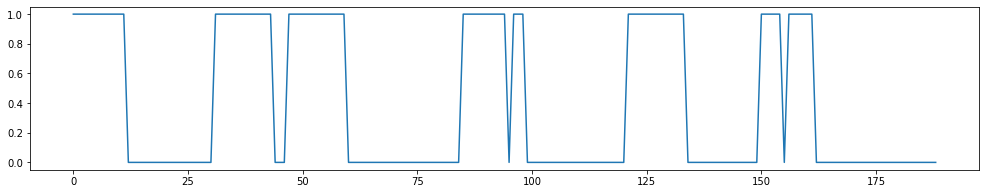

In [85]:
plt.figure(figsize=(17, 3))
plt.plot(y_pred)

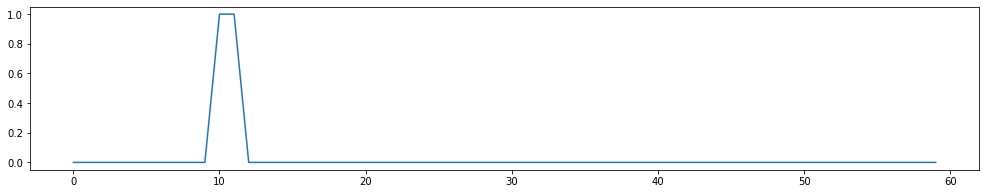

In [63]:
plt.figure(figsize=(17, 3))
plt.plot(y_pred[340:400])

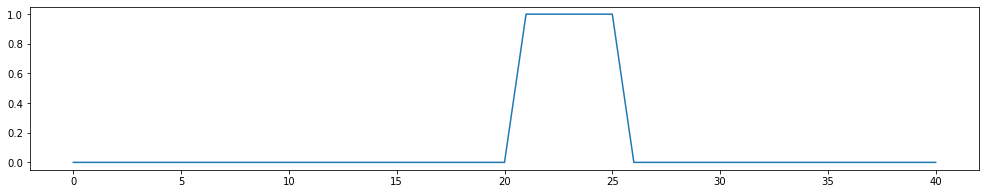

In [18]:
plt.figure(figsize=(17, 3))
plt.plot(y_pred)

In [395]:
IPython.display.Audio(data=sound[20], rate=16000)

In [166]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
len(y_pred)

5319

In [432]:
y, sr = load('test.wav')
resample = librosa.resample(y, sr, 16000)

test = []
sound = []

for i in range (int(len(resample)/16000)-1):
    p = i * 16000
    q = p + 32000
    split = resample[p:q]
    
    max_mine = np.max(split)
    ratio = 0.46202388 / max_mine
    
    split = split * ratio
    
    sound.append(split)
    mfcc = librosa.feature.mfcc(split, sr=16000)
    test = np.array(mfcc)
    test.append(mfcc)
    
test = np.array(test)
test_X = np.expand_dims(test, -1)

Y_pred = model.predict(test_X)
y_pred = np.argmax(Y_pred,axis=1)
print('[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]')    
print(y_pred)

In [442]:
test_X.shape

(1, 20, 63)

In [441]:
test_X = np.expand_dims(test, 0)

In [443]:
Y_pred = model.predict(test_X)

In [444]:
Y_pred

array([[0.9887794 , 0.01122051]], dtype=float32)